# Identificação no dominio da frequência
### *
Temos o circuito:
$$V_0(S)=V_I(S)\frac{LS/\frac{1}{SC}}{R+LS/\frac{1}{SC}}$$
Equivalente a:
$$G(S)=\frac{V_0(S)}{V_I(S)}=\frac{LS}{R+LS+S^2RLC}$$
Para obter a resposta em frequência, fazermo $S=j\omega$:
$$G(j\omega)=\frac{V_0(j\omega)}{V_I(j\omega)}=\frac{L(j\omega)}{R+L(j\omega)+(j\omega)^2RLC}$$
Variando a frequência $\omega$, obtemos a resposta em frequência $G(j\omega) \in \Complex$
### Exemplo:
Obter a resposta do sistema para um conjunto de frequências $\omega k, k = 1,2,3,...,1000$. Distribua logaritimamente os 1000 pontos de frequência $\omega k$ no intervalo [0.01,10] rad/s. Considere:
$$R=1\Omega \\
L=2H \\
C=3F
$$

Sendo:
$$G(S)=\frac{2S}{1+2S+6S^2}=\frac{b_0+b_1S}{1+a_1S+a_2S^2}$$
Com $b_0=0,b_1=2,a_1=2,a_2=6$

### Pergunta
Supondo que eu medi a resposta em frequência $G(j\omega k)$ de um sistema para N frequências diferentes $\omega k, k = 1,2,3,...,N$. Eu consigo estimar a função de transferência?
$$(\omega k, G(S_k)),k=1,2,3,...,N \rightarrow \frac{b_0+b_1S}{1+a_1S+a_2S^2}$$


In [63]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sympy

sympy.init_printing(order='old')

In [64]:
b0 = 0
b1 = 2
a0 = 1
a1 = 2
a2 = 6
N = 1000
w = np.logspace(start=-2,stop=1,num=N)
S = 1j*w
G_s = (b0+b1*S)/(a0+a1*S+a2*(S**2))

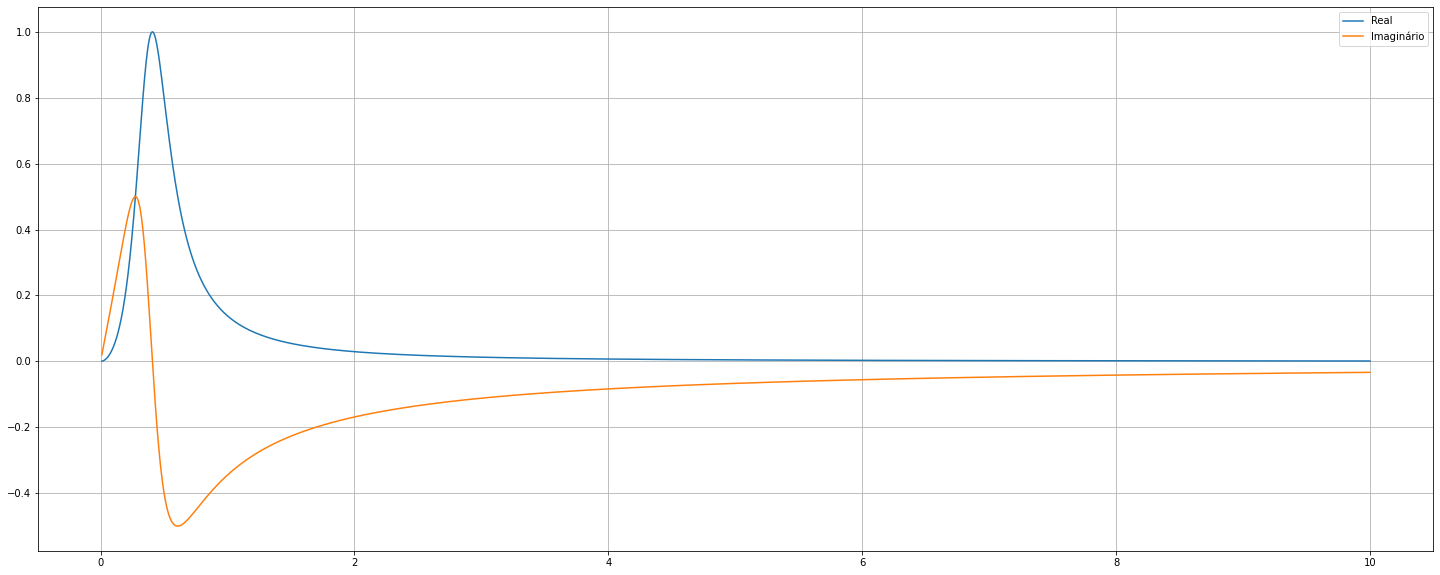

In [65]:
plt.figure(figsize=(25,10))
sns.lineplot(x=w,y=G_s.real,label='Real')
sns.lineplot(x=w,y=G_s.imag,label='Imaginário')
plt.grid()
plt.show()
plt.close()


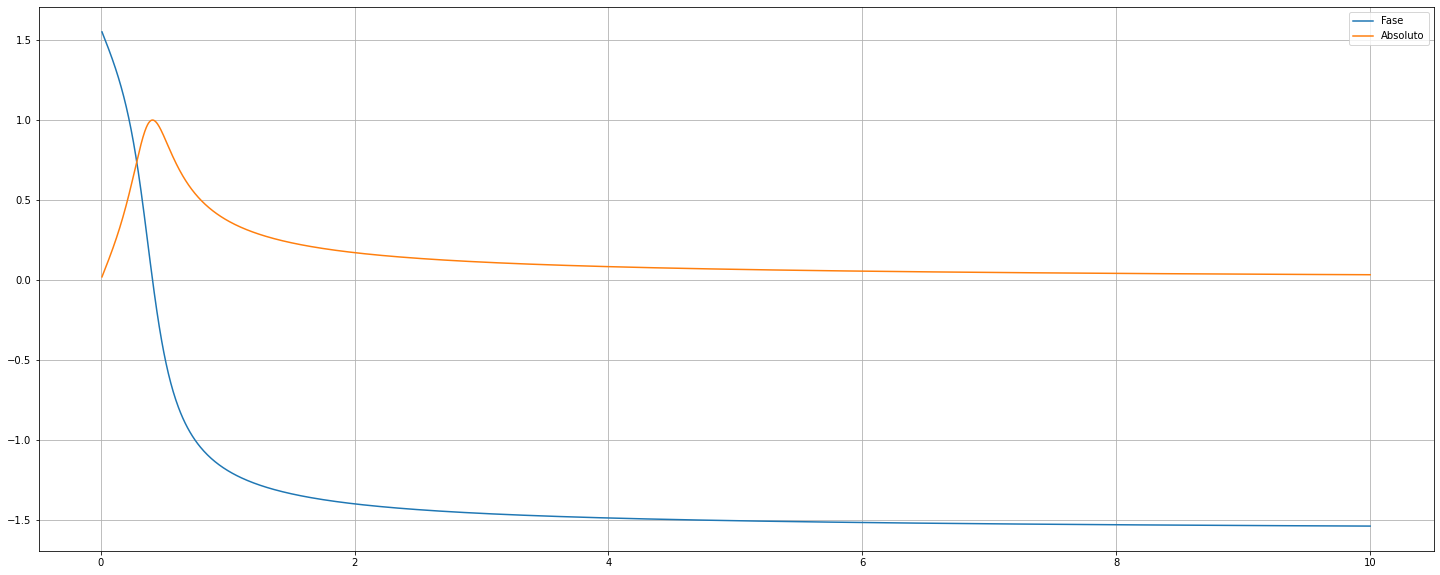

In [66]:
plt.figure(figsize=(25,10))
sns.lineplot(x=w,y=np.angle(G_s),label='Fase')
sns.lineplot(x=w,y=np.abs(G_s),label='Absoluto')
plt.grid()
plt.show()
plt.close()


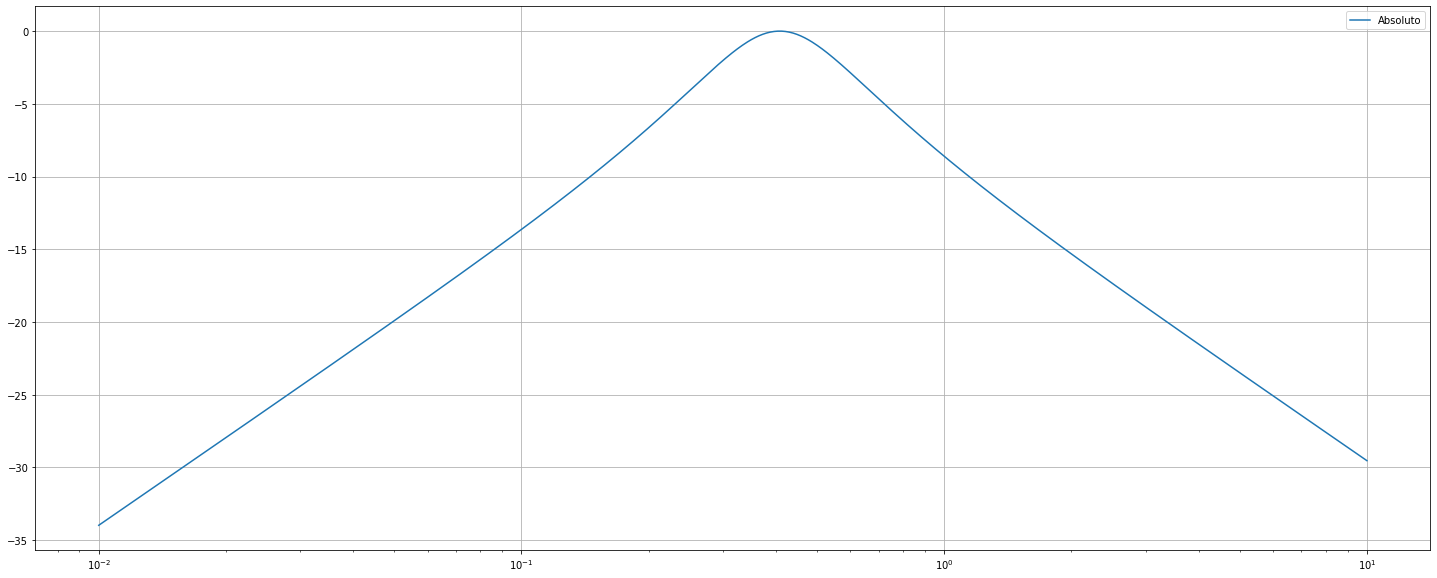

In [67]:
plt.figure(figsize=(25,10))
G_s_ganho = 20*np.log10(np.abs(G_s))
p1 = sns.lineplot(x=w,y=G_s_ganho,label='Absoluto')
p1.set(xscale="log")
plt.grid()
plt.show()
plt.close()

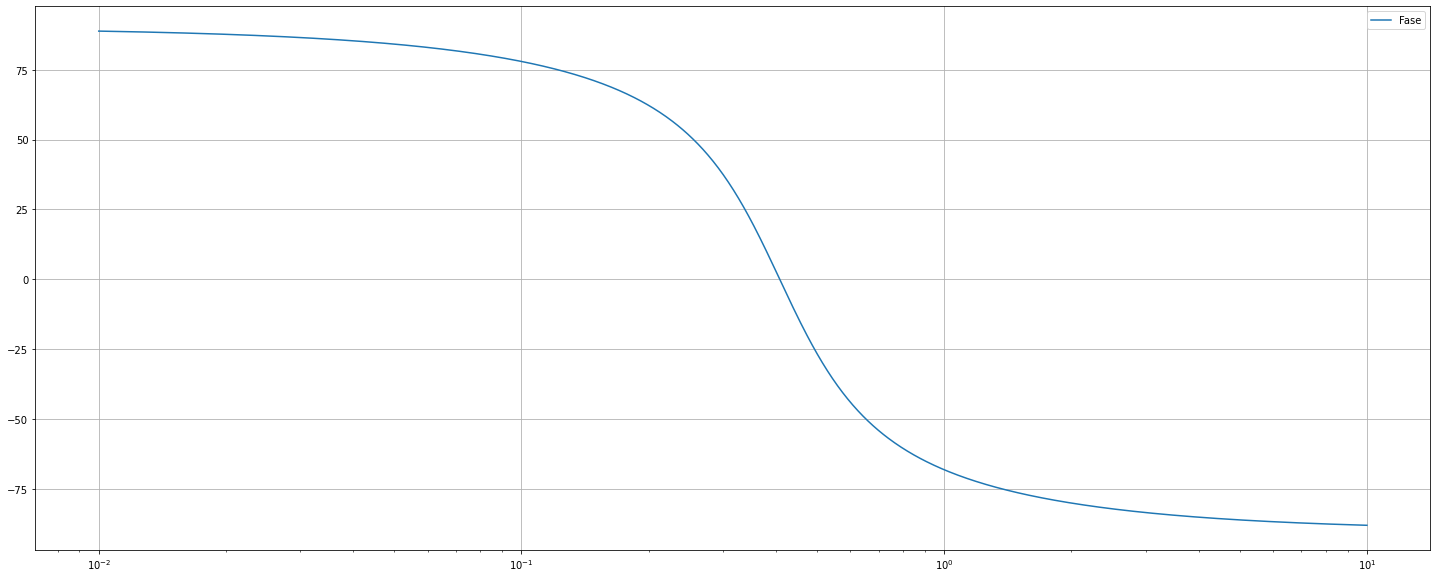

In [68]:
plt.figure(figsize=(25,10))
G_s_fase = np.angle(G_s)*180/np.pi
p1 = sns.lineplot(x=w,y=G_s_fase,label='Fase')
p1.set(xscale="log")
plt.grid()
plt.show()
plt.close()

### Método de Levy (Solve et Coagula)
O método presume um modelo na forma:
$$\hat{G}(S)=\frac{b_0+b_1S+b_2S^2+...+b_{nb}S^{nb}}{a_0+a_1S+a_2S^2+...+a_{na}S^{na}}$$
Para o caso simples $na=2$ e $nb=1$:
$$\hat{G}(S)=\frac{b_0+b_1S}{a_0+a_1S+a_2S^2}$$
Em termos de resposta em frequência:
$$\hat{G}(j\omega k)=\frac{b_0+b_1(j\omega k)}{a_0+a_1(j\omega k)+a_2(j\omega k)^2}$$


### Ideia
Encontrar os valores de $\theta=\begin{bmatrix} b_0 & b_1 & a_1 & a_2 \end{bmatrix}$ que minizam:
$$J(\theta)=\frac{1}{N}\sum\limits_{k=1}^{N}\left| G(j\omega k)-\hat{G}(j\omega k)\right|^2$$
Se torna uma função não linear em seus parametros:
$$J(\theta)=\frac{1}{N}\sum\limits_{k=1}^{N}\left| G(j\omega k)-\frac{b_0+b_1(j\omega k)}{a_0+a_1(j\omega k)+a_2(j\omega k)^2}\right|^2$$

### Função alternativa
Como ela não é linear em $\theta$, usaremos uma função alternativa:
$$\tilde{J}(\theta)=\frac{1}{N}\sum\limits_{k=1}^{N}\left| (a_0+a_1(j\omega k)+a_2(j\omega k)^2)G(j\omega k)-(b_0+b_1(j\omega k))\right|^2$$
$$0=(a_0+a_1(j\omega k)+a_2(j\omega k)^2)G(j\omega k)-(b_0+b_1(j\omega k))$$
$$0=a_0G(j\omega k)+a_1(j\omega k)G(j\omega k)+a_2(j\omega k)^2G(j\omega k)-b_0-b_1(j\omega k)$$
Fazemos $a_0=1$ e arrumamos a equação:
$$G(j\omega k)=b_0+b_1(j\omega k)-a_1(j\omega k)G(j\omega k)-a_2(j\omega k)^2G(j\omega k)$$
Sendo $S_k=j\omega k$:
$$G(j\omega k)=\hat{y}=M\theta=\begin{bmatrix} 1 & S_k & -S_kG(S_k) & -S_k^2G(S_k)\end{bmatrix} \cdot \begin{bmatrix}b_0 & b_1 & a_1 & a_2 \end{bmatrix}^T$$
Para calcular os valores, fazemos:
$$\tilde{M}=\begin{bmatrix} \Re(M) \\ \Im(M)\end{bmatrix}$$
$$\tilde{y}=\begin{bmatrix} \Re(y) \\ \Im(y)\end{bmatrix}$$
Aonde:
$$\theta^*=(\tilde{M}^T\tilde{M})^{-1}\tilde{M}^T\tilde{y}$$
Sendo as correspondencias:
$$G(S_k)=y$$
$$S_k=u$$


### Atividade da aula
Use o conjunto de dados 'resp_em_freq_circuito_rlc.mat' e calcule os coeficientes $b_0,b_1,a_1,a_2$ ($A(S_k) e B(S_k)$) e compare os resultados com os dados originais.

In [69]:
with open('aula_04.csv') as f:
    data = f.read()
data = data.split()
data = np.array(list(zip(*[list(map(complex,x.split(';'))) for x in data])))
u = data[0,:].real
y = data[1,:]

In [70]:
def lsqrt_complex_freq(u, y, na=2, nb=1, Ainv=np.ones(1)):
    amostras = u.size
    params = na+nb+1
    M = np.ones((amostras, params), dtype=complex)

    for i in range(nb+1):
        M[:,i] = u**i

    for i in range(nb+1, params):
        j = i - nb
        M[:,i] = -u**j*y
    M = M*Ainv.reshape((Ainv.size,1))
    y = y*Ainv
    M = np.concatenate([M.real, M.imag])
    y_tilde = np.concatenate([y.real, y.imag])
    theta = np.linalg.inv(M.T.dot(M)).dot(M.T).dot(y_tilde)
    y_hat_tilde = np.sum(M*theta.T,axis=1)
    y_hat = y_hat_tilde[:amostras]+1j*y_hat_tilde[amostras:]
    return y_hat, theta

In [71]:
def funcao_g_sk(u, theta, na=2, nb=1):
    params = na+nb+1
    B = 0
    for i in range(nb+1):
        B += theta[i]*u**i
    A = 1
    for i in range(nb+1, params):
        j = i - nb
        A += theta[i]*u**j
    return B/A

In [72]:
def A_sk(u, theta, na, nb):
    A = 1
    params = na+nb+1
    for i in range(nb+1, params):
        j = i - nb
        A += theta[i]*u**j
    return 1/A

In [73]:
def show_equation(theta, na, nb):
    u = sympy.symbols('u')
    zero = sympy.symbols('0')
    params = na+nb+1
    B = 0
    for i in range(nb+1):
        v = np.int32(theta[i]*100)/100
        v = v if v else zero
        B += v*u**i
    A = 1
    for i in range(nb+1, params):
        j = i - nb
        v = np.int32(theta[i]*100)/100
        v = v if v else zero
        A += v*u**j
    expr = B/A
    return sympy.simplify(expr)

In [74]:
noise=True
if noise:
    y += 0.05*(np.random.normal(size=u.size)+1j*np.random.normal(size=u.size))

In [1]:
def gerar_dados(u, y, na, nb, L=1):
    theta = np.zeros(na+nb+1)
    for _ in range(L):
        Ainv = A_sk(1j*u, theta, na, nb)
        _, theta = lsqrt_complex_freq(1j*u, y, na=na, nb=nb, Ainv=Ainv)
        y_hat = funcao_g_sk(1j*u, theta, na, nb)
    return y_hat

In [75]:
na = 2
nb = 2
theta = np.zeros(na+nb+1)
L=10 # 1 para levi
for i in range(L):
    Ainv = A_sk(1j*u, theta, na, nb)
    y_hat, theta = lsqrt_complex_freq(1j*u, y, na=na, nb=nb, Ainv=Ainv)
    y_hat2 = funcao_g_sk(1j*u, theta, na, nb)
    print(f'MSE lsqrt:{np.sum(np.abs(y-y_hat)**2)/y.size}')
    print(f'MSE G(SK):{np.sum(np.abs(y-y_hat2)**2)/y.size}')
    print(np.int32(theta*1000)/1000)
    print('----')

MSE lsqrt:0.12122623336729935
MSE G(SK):0.12122324962127386
[ 0.186 -0.008  0.002  0.175  0.027]
----
MSE lsqrt:0.12440969524019675
MSE G(SK):0.12027635495133572
[ 0.189 -0.008  0.003  0.202  0.045]
----
MSE lsqrt:0.12499268328359556
MSE G(SK):0.1196533753096949
[ 0.19  -0.007  0.003  0.222  0.07 ]
----
MSE lsqrt:0.12572673455908884
MSE G(SK):0.11917038010809769
[ 0.191 -0.001  0.004  0.242  0.113]
----
MSE lsqrt:0.1270970467990954
MSE G(SK):0.11883723032712097
[0.19  0.016 0.006 0.269 0.204]
----
MSE lsqrt:0.12954023978973875
MSE G(SK):0.11785475278460097
[0.185 0.072 0.01  0.322 0.45 ]
----
MSE lsqrt:0.13256031082226225
MSE G(SK):0.105544850097541
[0.163 0.32  0.015 0.535 1.357]
----
MSE lsqrt:0.15545608885424378
MSE G(SK):0.020087351494330177
[ 7.200e-02  1.285e+00 -4.000e-03  1.360e+00  4.255e+00]
----
MSE lsqrt:0.25997502325636984
MSE G(SK):0.005108784749347058
[ 0.008  1.909 -0.028  1.912  5.807]
----
MSE lsqrt:0.2601054901140739
MSE G(SK):0.005002013379859717
[ 5.000e-03  1.952e

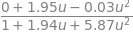

In [76]:
show_equation(theta, na, nb)

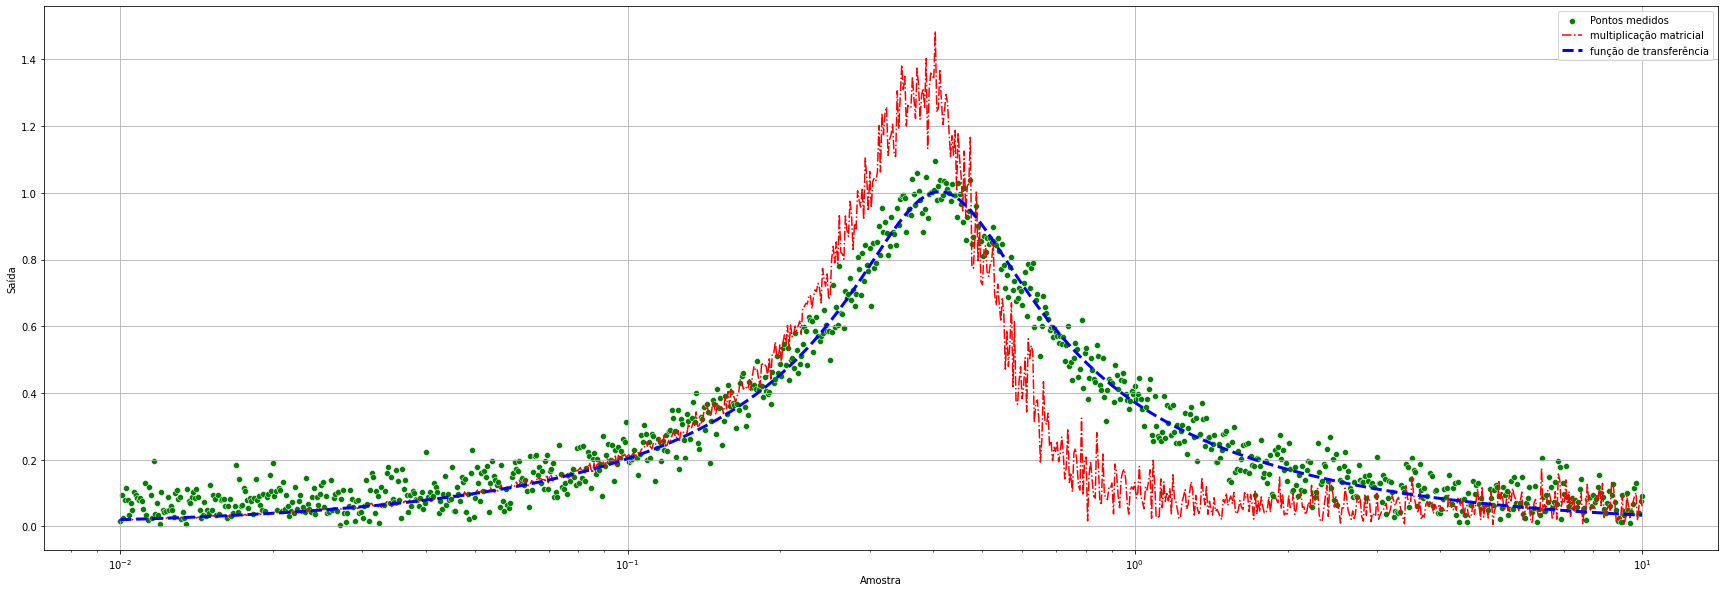

In [77]:
# Plota a figura
plt.figure(figsize = (30,10))
# Plots
sns.scatterplot(x=u,y=np.abs(y),color='green',markers='.',label='Pontos medidos')
sns.lineplot(x=u,y=np.abs(y_hat),color='red',linestyle='-.',label='multiplicação matricial')
p1 = sns.lineplot(x=u,y=np.abs(y_hat2).real,color='blue',linestyle='--',label='função de transferência',linewidth=3)
p1.set(xscale="log")
# Titulo e informações
plt.xlabel('Amostra')
plt.ylabel('Saída')
# Grid e show
plt.grid()
plt.show()
plt.close()

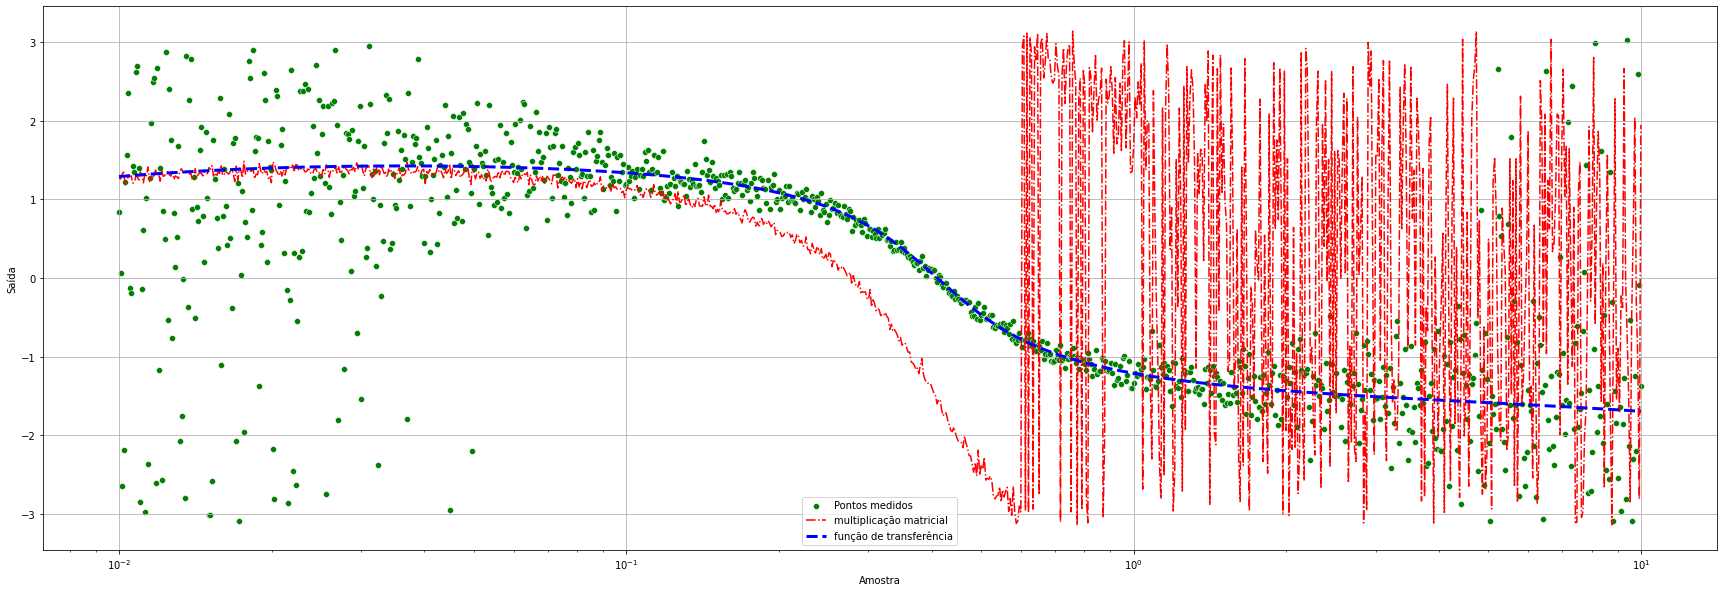

In [78]:
# Plota a figura
plt.figure(figsize = (30,10))
# Plots
sns.scatterplot(x=u,y=np.angle(y),color='green',markers='.',label='Pontos medidos')
sns.lineplot(x=u,y=np.angle(y_hat),color='red',linestyle='-.',label='multiplicação matricial')
p1 = sns.lineplot(x=u,y=np.angle(y_hat2).real,color='blue',linestyle='--',label='função de transferência',linewidth=3)
p1.set(xscale="log")
# Titulo e informações
plt.xlabel('Amostra')
plt.ylabel('Saída')
# Grid e show
plt.grid()
plt.show()
plt.close()